# Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from tqdm import tqdm
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import joblib
import logging
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [5]:
df = pd.read_csv('housing.csv')

### some infromation about data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
nan_counts = df.isna().sum()
nan_percentage = (df.isna().sum() / len(df)) * 100
nan_summary = pd.DataFrame({
        'Missing Values': nan_counts,
        'Percentage': nan_percentage
})
print(nan_summary)

                    Missing Values  Percentage
longitude                        0    0.000000
latitude                         0    0.000000
housing_median_age               0    0.000000
total_rooms                      0    0.000000
total_bedrooms                 207    1.002907
population                       0    0.000000
households                       0    0.000000
median_income                    0    0.000000
median_house_value               0    0.000000
ocean_proximity                  0    0.000000


# Data Analysis

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

### Histogram Analysis of Housing Dataset

The chart below displays histograms for multiple variables in a housing dataset, showing the frequency distributions for each feature:

1. **Longitude and Latitude**: 
   - These histograms show the geographical distribution of housing locations. 
   - The data clusters in specific ranges, likely reflecting areas with dense housing populations.

2. **Housing Median Age**: 
   - The age of houses peaks around 20-30 years.
   - A significant portion of houses are relatively old, with values reaching up to 50 years.

3. **Total Rooms and Total Bedrooms**: 
   - Both features exhibit a heavily right-skewed distribution.
   - Most homes have a small number of rooms and bedrooms, with a few outliers showing extremely high values.

4. **Population**: 
   - The population distribution is right-skewed.
   - Most housing areas have a small population, but some areas show exceptionally large populations.

5. **Households**: 
   - Similar to population and room counts, the number of households is right-skewed.
   - Most areas have fewer than 1000 households.

6. **Median Income**: 
   - This feature has a more symmetric distribution, though slightly right-skewed.
   - The majority of incomes range from $2K to $6K, with fewer cases above $10K.

7. **Median House Value**: 
   - The distribution is capped at $500,000, suggesting a possible upper limit in the data.
   - Most houses are priced below this cap, with values peaking between $100,000 and $200,000.

These histograms provide insights into the spread and concentration of various housing characteristics, which are crucial for understanding the dataset and preprocessing it for further analysis.


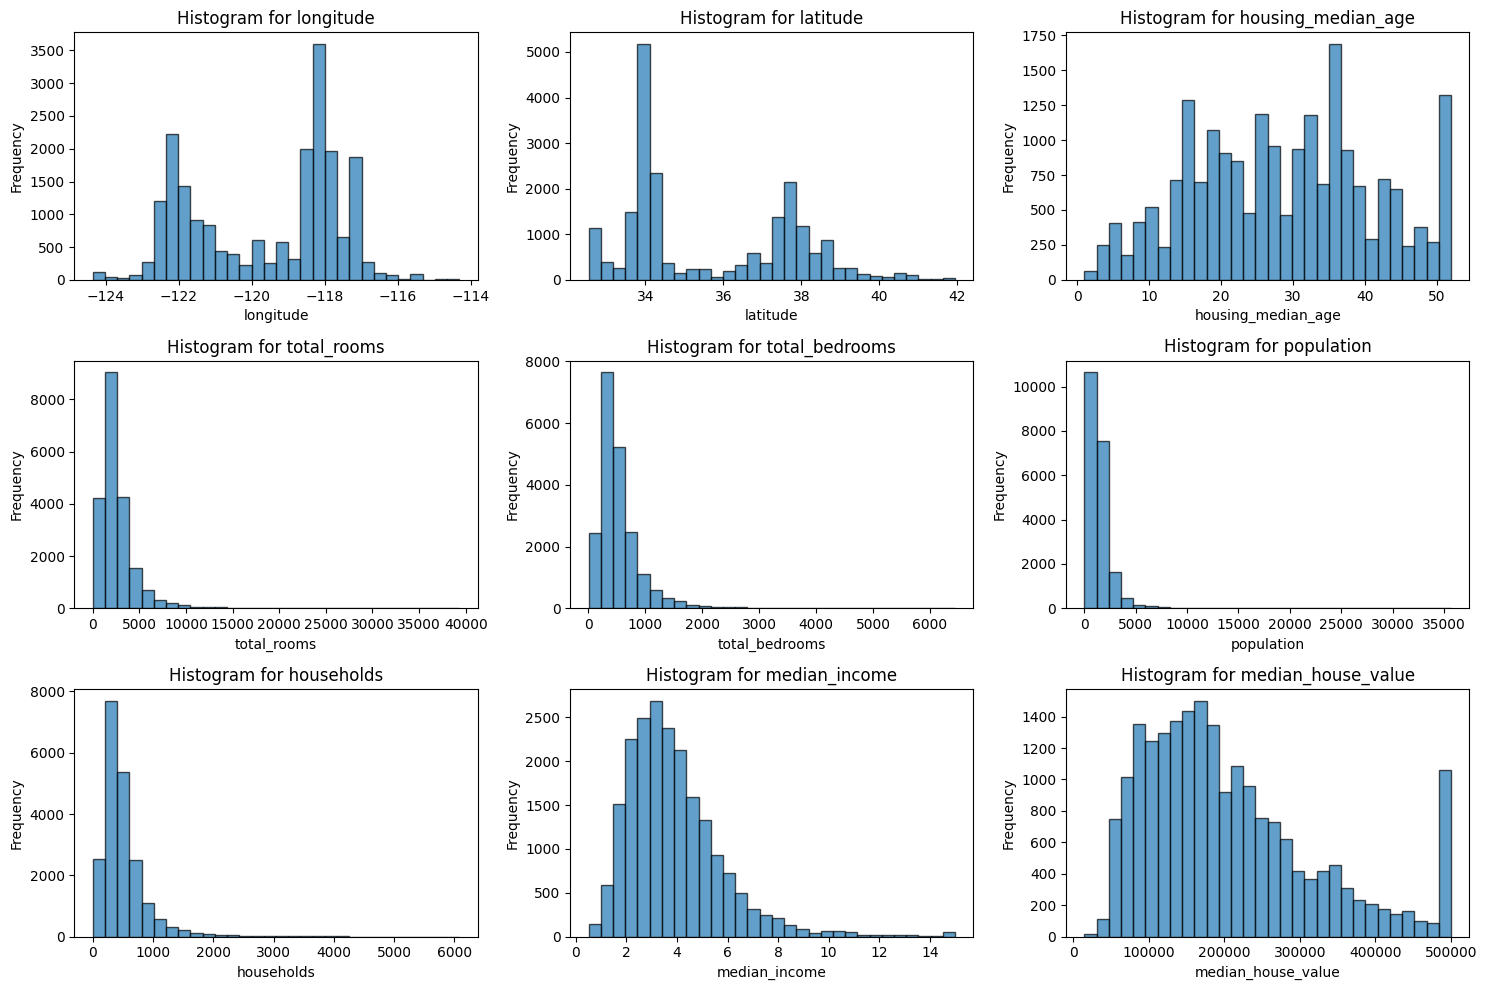

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size as necessary
    df[column].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Box Plot Analysis of Housing Dataset

The chart below displays box plots for multiple variables in a housing dataset, providing insights into the range, median, and presence of outliers for each feature:

1. **Longitude and Latitude**: 
   - These box plots show the spread of housing locations.
   - No significant outliers are present, and the data is evenly distributed within the interquartile range (IQR).

2. **Housing Median Age**: 
   - The box plot indicates that the median age of houses is around 30 years.
   - The data is evenly spread, with no extreme outliers, and the age is capped at 50.

3. **Total Rooms and Total Bedrooms**: 
   - Both features have numerous outliers, represented by dots far from the whiskers.
   - Most houses have a small number of rooms and bedrooms, while a few have extremely high values.

4. **Population**: 
   - The box plot reveals many outliers for high population values.
   - Most areas have a small population, with some extreme cases having populations exceeding 20,000.

5. **Households**: 
   - Similar to population, the households feature shows many outliers.
   - Most areas have fewer than 1,000 households, but some exceed this by a significant margin.

6. **Median Income**: 
   - The median income data is fairly concentrated within the IQR, with few outliers.
   - The majority of incomes fall between $2K and $6K.

7. **Median House Value**: 
   - The data is capped at 500,000, which appears to suppress potential outliers.
   - The values are evenly distributed, with a median around 200,000.

These box plots highlight the variability and presence of outliers in features like total rooms, total bedrooms, population, and households, which may require normalization or transformation for further analysis.


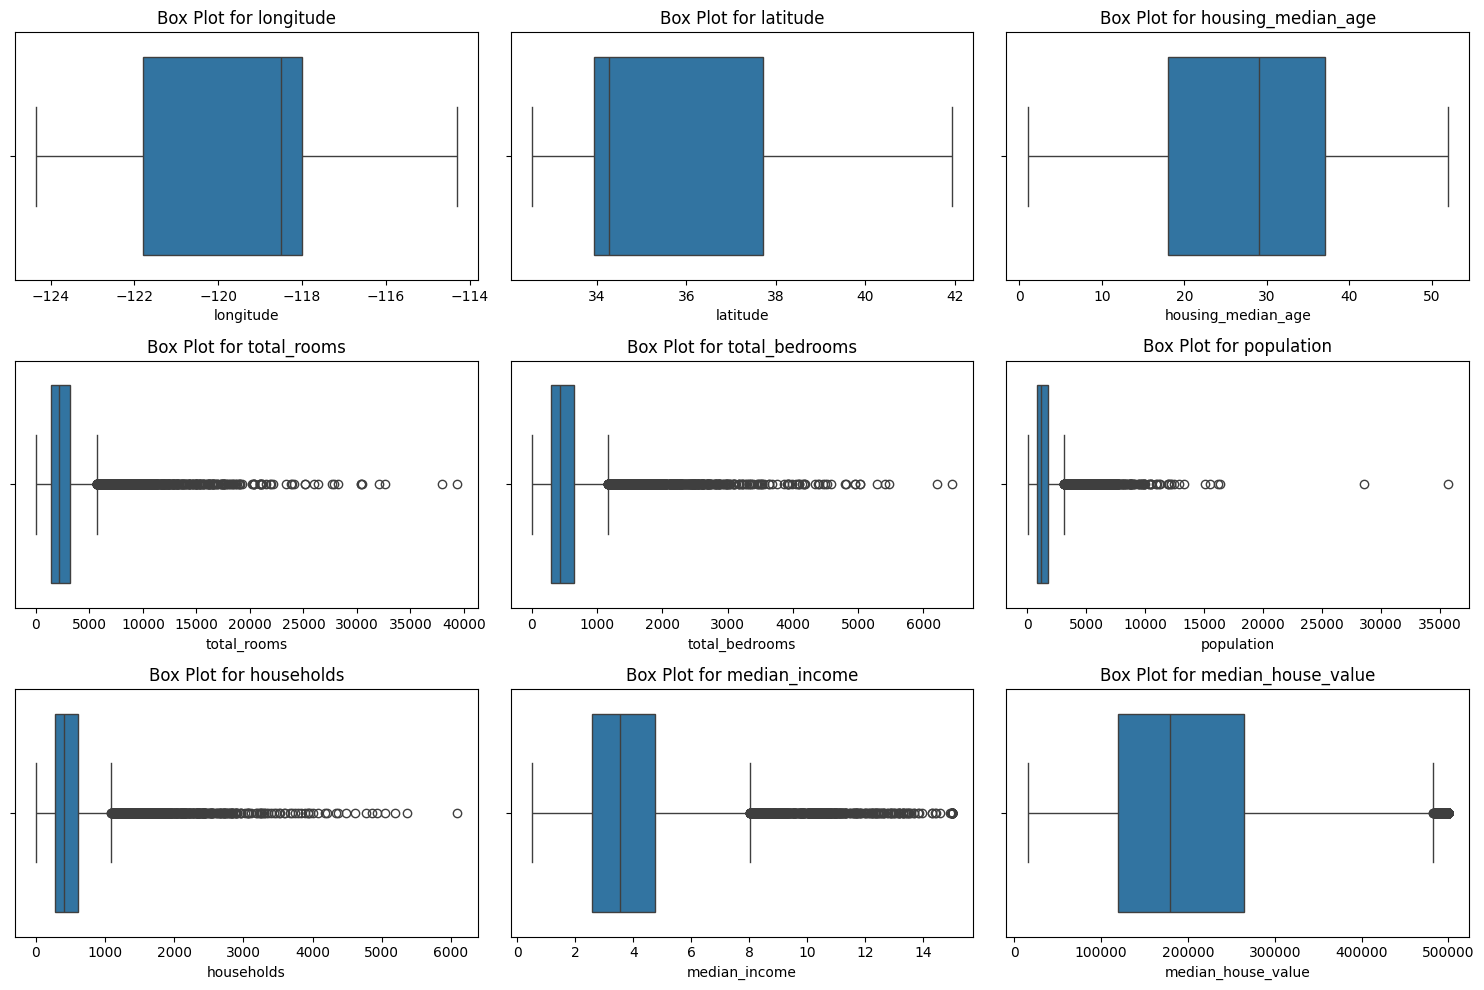

In [12]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (adjust rows and columns as needed)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

### Boxplot of Ocean Proximity Categories vs Median House Value

The below chart visualizes the distribution of **Median House Values** for different categories of **ocean proximity**. Each boxplot represents the spread and key statistics (e.g., median, quartiles) of house values within each category.

#### Key Features:
1. **Ocean Proximity Categories** (x-axis):
   - `NEAR BAY`: Houses near a bay.
   - `<1H OCEAN`: Houses within a 1-hour drive from the ocean.
   - `INLAND`: Houses located away from coastal areas.
   - `NEAR OCEAN`: Houses near the ocean.
   - `ISLAND`: Houses located on islands.

2. **Boxplot Explanation**:
   - **Box**: Represents the interquartile range (IQR), showing the middle 50% of house values.
   - **Median**: The horizontal line inside the box indicates the median house value for each category.
   - **Whiskers**: Extend to show the range of values within 1.5 times the IQR.
   - **Outliers**: Data points outside the whisker range are displayed as individual dots.

#### Observations:
- **ISLAND** has the highest median house value, with a small spread, indicating high-value homes with little variation.
- **NEAR BAY** and **NEAR OCEAN** categories also show relatively high median house values with larger spreads compared to other categories.
- **INLAND** has the lowest median house value, with a significant number of outliers above the whisker range, indicating some expensive properties in inland areas.
- **<1H OCEAN** shows a moderate spread, with house values generally lower than coastal categories but higher than inland areas.

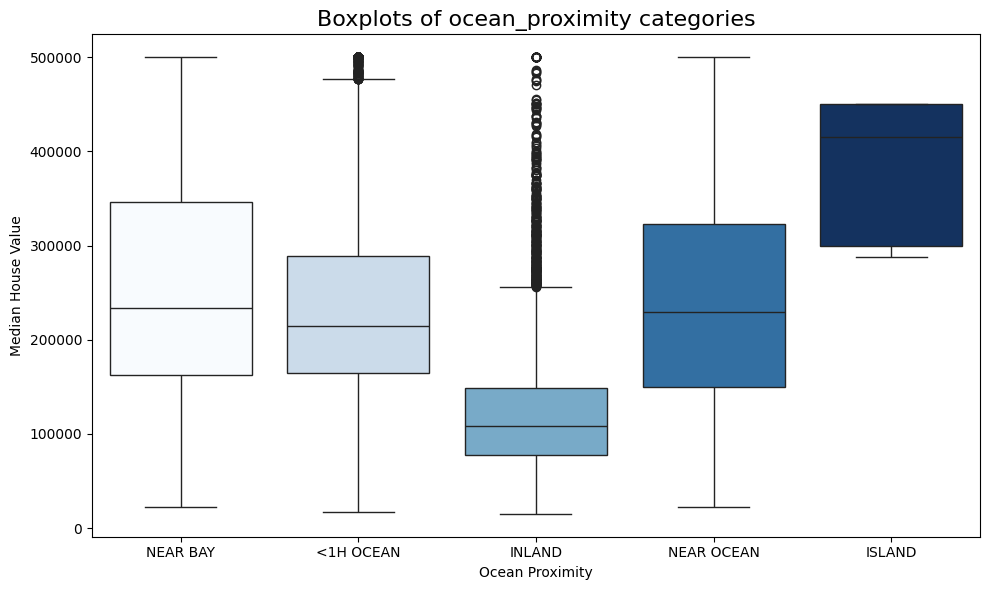

In [14]:
cmap = plt.cm.Blues
norm = mcolors.Normalize(vmin=0, vmax=1)
colors = [cmap(norm(i)) for i in np.linspace(0, 1, len(df["ocean_proximity"].unique()))]  
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value", 
                hue="ocean_proximity", palette=colors, legend=False)  
plt.title('Boxplots of ocean_proximity categories', fontsize=16)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')  
plt.tight_layout()
plt.show()

# Data Preprocessing

### `DataPreprocessor` Class

The `DataPreprocessor` class is designed to perform feature engineering, outlier handling, and scaling on datasets. It provides various preprocessing functionalities:

- **Outlier Detection**: Outliers are handled using the Interquartile Range (IQR) method with a configurable multiplier.
- **Missing Value Imputation**: Missing values in quantitative columns are filled using either the mean or median value of the column.
- **Feature Creation**: New features are derived from existing columns. For example:
  - `population_per_room`: Ratio of population to total rooms.
  - `distance_to_center`: Haversine distance from a central point (calculated based on latitude and longitude).
- **Categorical Encoding**: Categorical columns like 'grid' are encoded using label encoding.
- **Feature Scaling**: Numerical features are scaled using standard scaling techniques (mean = 0, variance = 1).

#### Key Methods:
- `fit(X)`: Computes statistics like quantiles, mean, and median for quantitative columns.
- `handle_outliers(X)`: Caps outliers using the IQR method.
- `fill_missing(X)`: Fills missing values using the specified imputation strategy.
- `create_features(X)`: Creates new features based on existing columns.
- `encode_categorical(X)`: Encodes categorical columns (e.g., 'grid').
- `scale_features(X)`: Scales numerical features using StandardScaler.
- `transform(X)`: Applies all preprocessing steps sequentially on the dataset.

#### Parameters:
- `outlier_factor`: Multiplier for the IQR used to detect outliers (default is 1.5).
- `imputation_strategy`: Strategy for filling missing values (`'mean'` or `'median'`).
- `verbose`: If `True`, enables logging for debugging.

This class is ideal for preparing datasets for machine learning tasks by handling common preprocessing steps in a streamlined manner.


In [3]:
class DataPreprocessor:
    def __init__(self, outlier_factor=1.5, imputation_strategy='mean', verbose=True):
        """
        Data Preprocessor for feature engineering, outlier handling, and scaling.
        :param quantitative: List of quantitative column names.
        :param outlier_factor: Multiplier for the IQR in outlier detection.
        :param imputation_strategy: Strategy for filling missing values ('mean' or 'median').
        :param verbose: If True, enable logging for debugging.
        """
        self.quantitative = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
        self.outlier_factor = outlier_factor
        self.imputation_strategy = imputation_strategy
        self.label_encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.stats = {}
        self.verbose = verbose
        if verbose:
            logging.basicConfig(level=logging.INFO)

    def fit(self, X: pd.DataFrame):
        """
        Fit the preprocessor by calculating statistics for the given data.
        """
        if self.verbose:
            logging.info("Fitting preprocessor...")
        
        self.stats['quantiles'] = {
            col: {
                'q1': X[col].quantile(0.25),
                'q3': X[col].quantile(0.75)
            }
            for col in self.quantitative
        }
        self.stats['means'] = X[self.quantitative].mean()
        self.stats['medians'] = X[self.quantitative].median()
        self.stats['lat_mean'] = X['latitude'].mean()
        self.stats['lon_mean'] = X['longitude'].mean()

    def handle_outliers(self, X: pd.DataFrame):
        """
        Handle outliers by capping values using the IQR method.
        """
        if self.verbose:
            logging.info("Handling outliers...")
        
        for col in self.quantitative:
            q1 = self.stats['quantiles'][col]['q1']
            q3 = self.stats['quantiles'][col]['q3']
            iqr = q3 - q1
            lower_bound = q1 - self.outlier_factor * iqr
            upper_bound = q3 + self.outlier_factor * iqr
            X[col] = np.clip(X[col], lower_bound, upper_bound)

    def fill_missing(self, X: pd.DataFrame):
        """
        Fill missing values using the specified imputation strategy.
        """
        if self.verbose:
            logging.info("Filling missing values...")
        
        for col in self.quantitative:
            value = self.stats['means'][col] if self.imputation_strategy == 'mean' else self.stats['medians'][col]
            X[col] = X[col].fillna(value)
            

    def create_features(self, X: pd.DataFrame):
        """
        Create new features for the dataset.
        """
        if self.verbose:
            logging.info("Creating new features...")
        
        X['population_per_room'] = X['population'] / X['total_rooms']
        X['bedroom_share'] = X['total_bedrooms'] / X['total_rooms'] * 100
        X['diag_coord'] = X['longitude'] + X['latitude']
        X['distance_to_center'] = self.haversine(X['latitude'], X['longitude'], self.stats['lat_mean'], self.stats['lon_mean'])
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['income_per_population'] = X['median_income'] * X['population']

    def haversine(self, lat1, lon1, lat2, lon2):
        """
        Calculate the Haversine distance between two points.
        """
        R = 6371.0
        lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2_rad - lat1_rad
        dlon = lon2_rad - lon1_rad
        a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
        return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    def encode_categorical(self, X: pd.DataFrame):
        """
        Encode categorical columns.
        """
        if self.verbose:
            logging.info("Encoding categorical features...")
        
        if 'grid' in X:
            X['grid_encoded'] = self.label_encoder.fit_transform(X['grid'])
            X = X.drop(columns=['grid'])

    def scale_features(self, X: pd.DataFrame):
        """
        Scale numerical features.
        """
        if self.verbose:
            logging.info("Scaling features...")
        
        X[self.quantitative] = self.scaler.fit_transform(X[self.quantitative])

    def transform(self, X: pd.DataFrame):
        """
        Apply all transformations to the dataset.
        """
        X = X.copy()
        self.handle_outliers(X)
        self.fill_missing(X)
        self.create_features(X)
        self.encode_categorical(X)
        self.scale_features(X)
        del X['ocean_proximity']
        return X

In [4]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = DataPreprocessor(outlier_factor=1.5, imputation_strategy='median', verbose=True)
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

INFO:root:Fitting preprocessor...
INFO:root:Handling outliers...
INFO:root:Filling missing values...
INFO:root:Creating new features...
INFO:root:Encoding categorical features...
INFO:root:Scaling features...
INFO:root:Handling outliers...
INFO:root:Filling missing values...
INFO:root:Creating new features...
INFO:root:Encoding categorical features...
INFO:root:Scaling features...


### Estimating Feature Importance through the Random Forest Model

The below bar chart shows the relative importance of various features as determined by a **Random Forest Model**. Feature importance reflects how much each feature contributes to predicting the target variable.

#### Key Features:
1. **Features** (y-axis):
   - Lists the input features used in the model, such as `median_income`, `latitude`, and `total_rooms`.

2. **Feature Importance** (x-axis):
   - Indicates the importance score of each feature. A higher score means the feature has a larger impact on the model's predictions.

3. **Highlights**:
   - The importance values are normalized to sum up to 1, providing a relative comparison.

#### Observations:
- **`median_income`** is the most important feature by far, with an importance score above 0.4. This suggests that income levels have the strongest correlation with the target variable.
- **`diag_coord`** (possibly a spatial coordinate feature) and **`population_per_room`** are moderately important, indicating that spatial and density-related factors also contribute significantly to the predictions.
- Features such as **`distance_to_center`**, **`latitude`**, and **`longitude`** have lower but noticeable importance, reflecting the influence of geographic location.
- Features like **`population`**, **`households`**, and **`total_rooms`** have negligible importance, indicating limited predictive power in this dataset.

#### Interpretation:
This visualization helps identify which features should be prioritized or potentially engineered for better performance in the Random Forest model.


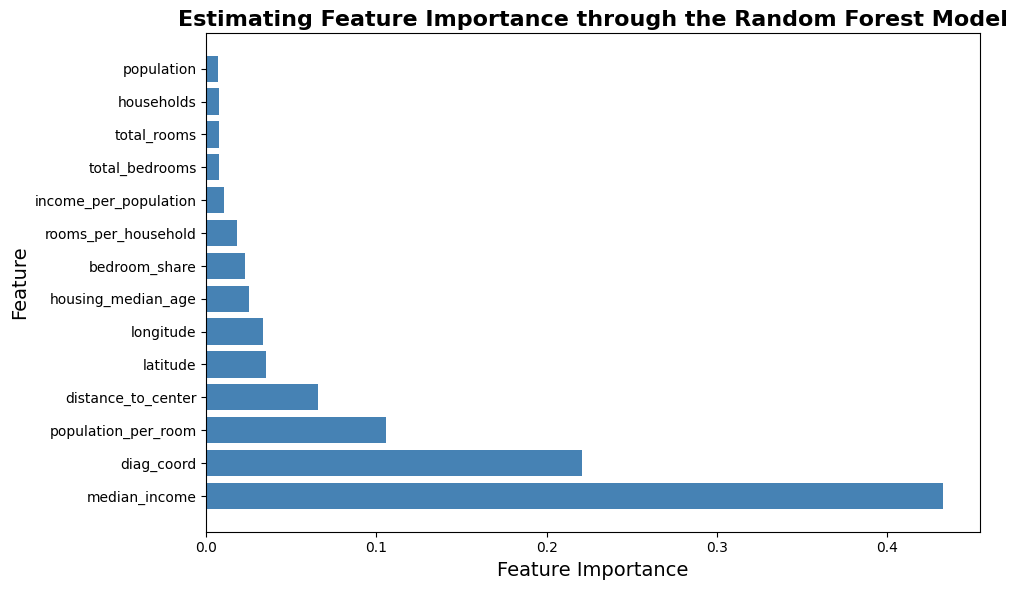

In [5]:
rf = RandomForestRegressor()

# Fit the model on the preprocessed training data
rf.fit(X_train_transformed, y_train)

# Extract feature importances
importances = rf.feature_importances_
features = X_train_transformed.columns

# Sort the feature importances in descending order for better visualization
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = features[indices]

# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')

# Add titles and labels
plt.title('Estimating Feature Importance through the Random Forest Model', fontsize=16, fontweight='bold', pad=5)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

### `make_model` Function

The `make_model` function is designed to evaluate the performance of machine learning models on training and testing datasets. It calculates key performance metrics such as R², Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for both the training and testing sets. The results are stored in a DataFrame for easy comparison between different models.

#### Parameters:
- `X_tr`: Training features.
- `X_te`: Testing features.
- `y_tr`: Training target values.
- `y_te`: Testing target values.
- `model`: The machine learning model to be evaluated.
- `model_name`: The name of the model, which will be recorded in the results.

#### Process:
1. **Fit the model**: The model is trained using the training data (`X_tr`, `y_tr`).
2. **Make Predictions**: Predictions are made on both the training set (`X_tr`) and testing set (`X_te`).
3. **Calculate Metrics**:
   - R² (coefficient of determination) for both training and testing data.
   - MAE, MSE, and RMSE for both training and testing data.
4. **Store Results**: The performance metrics for each model are appended to the `df_models` DataFrame.

#### `df_models` DataFrame Structure:
- **Algorithm**: Name of the model.
- **r2_train**: R² score on the training data.
- **r2_test**: R² score on the testing data.
- **mae_train**: MAE on the training data.
- **mae_test**: MAE on the testing data.
- **mse_train**: MSE on the training data.
- **mse_test**: MSE on the testing data.
- **rmse_train**: RMSE on the training data.
- **rmse_test**: RMSE on the testing data.

This function provides a convenient way to compare the performance of different models by calculating and storing various evaluation metrics.

In [6]:
df_models = pd.DataFrame(data=None, columns=[
    'Algorithm', 'r2_train', 'r2_test', 'mae_train', 'mae_test', 
    'mse_train', 'mse_test', 'rmse_train', 'rmse_test'
])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    # Fit the model
    model.fit(X_tr, y_tr)
    
    # Make predictions
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    
    # Calculate R2 scores
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    
    # Calculate additional metrics
    mae_train = mean_absolute_error(y_tr, y_pred_train)
    mae_test = mean_absolute_error(y_te, y_pred_test)
    
    mse_train = mean_squared_error(y_tr, y_pred_train)
    mse_test = mean_squared_error(y_te, y_pred_test)
    
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    # Append results to the dataframe
    df_models.loc[len(df_models)] = [model_name, r2_train, r2_test, mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test]

In [7]:
make_model(X_train_transformed, X_test_transformed, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, Ridge(), 'Ridge')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, Lasso(), 'Lasso')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, ElasticNet(), 'ElasticNet')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, GradientBoostingRegressor(), 'GradientBoosting')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, RandomForestRegressor(), 'RandomForest')
make_model(X_train_transformed, X_test_transformed, y_train, y_test, XGBRegressor(), 'XGBoost')

df_models

,Algorithm,r2_train,r2_test,mae_train,mae_test,mse_train,mse_test,rmse_train,rmse_test
0,LinearRegression,0.673248,0.569719,48887.020840,52666.818034,4.367946e+09,5.638438e+09,66090.440709,75089.533949
1,Ridge,0.673248,0.569712,48886.889815,52667.363055,4.367947e+09,5.638537e+09,66090.442884,75090.191451
2,Lasso,0.673248,0.569701,48886.826733,52672.230794,4.367946e+09,5.638682e+09,66090.440926,75091.158391
3,ElasticNet,0.562825,0.540562,57411.128236,58148.131768,5.844062e+09,6.020512e+09,76446.462716,77591.957288
4,GradientBoosting,0.821666,0.784159,33613.148541,36397.011991,2.383937e+09,2.828395e+09,48825.573607,53182.659353
5,RandomForest,0.977990,0.818636,10923.713325,32350.133745,2.942264e+08,2.376604e+09,17153.028704,48750.426870
6,XGBoost,0.952601,0.797735,17785.113281,34818.075396,6.336225e+08,2.650501e+09,25171.858752,51483.012210


### Model Performance Comparison

The table below presents the evaluation metrics for different machine learning algorithms based on their performance on training and testing datasets. The metrics used to assess model performance include the R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for both the training and testing sets.

| Algorithm           | r2_train | r2_test  | mae_train  | mae_test   | mse_train         | mse_test         | rmse_train    | rmse_test    |
|---------------------|----------|----------|------------|------------|-------------------|------------------|---------------|--------------|
| LinearRegression    | 0.673248 | 0.569719 | 48887.02   | 52666.82   | 4.37e+09          | 5.64e+09         | 66090.44      | 75089.53     |
| Ridge               | 0.673248 | 0.569712 | 48886.89   | 52667.36   | 4.37e+09          | 5.64e+09         | 66090.44      | 75090.19     |
| Lasso               | 0.673248 | 0.569701 | 48886.83   | 52672.23   | 4.37e+09          | 5.64e+09         | 66090.44      | 75091.16     |
| ElasticNet          | 0.562825 | 0.540562 | 57411.13   | 58148.13   | 5.84e+09          | 6.02e+09         | 76446.46      | 77591.96     |
| GradientBoosting    | 0.821666 | 0.784159 | 33613.15   | 36397.01   | 2.38e+09          | 2.83e+09         | 48825.57      | 53182.66     |
| RandomForest        | 0.977990 | 0.818636 | 10923.71   | 32350.13   | 2.94e+08          | 2.38e+09         | 17153.03      | 48750.43     |
| XGBoost             | 0.952601 | 0.797735 | 17785.11   | 34818.08   | 6.34e+08          | 2.65e+09         | 25171.86      | 51483.01     |

#### Key Insights:

1. **Linear Models (LinearRegression, Ridge, Lasso)**:
   - These models show similar performance, with a moderate R² value around 0.67 for training and 0.57 for testing.
   - Their MAE and RMSE are relatively high, indicating a larger prediction error.
   - The models perform similarly, suggesting that regularization (Ridge and Lasso) doesn't significantly improve the results over the simple Linear Regression in this case.

2. **ElasticNet**:
   - ElasticNet shows a lower performance compared to the linear models, with a R² score significantly lower than 0.67, both for training and testing.
   - MAE, MSE, and RMSE are higher, showing that the model struggles more with the dataset.

3. **GradientBoosting**:
   - This model provides a significant improvement, with an R² of 0.82 for training and 0.78 for testing, showing strong predictive power.
   - The MAE, MSE, and RMSE are much lower than those of the linear models, indicating that GradientBoosting handles the data more effectively.

4. **RandomForest**:
   - RandomForest excels with an impressive R² score of 0.98 for training and 0.82 for testing, outperforming all other models by a large margin.
   - It has the lowest MAE and RMSE, which suggests that it is very effective at making predictions.

5. **XGBoost**:
   - XGBoost provides solid performance with a good balance between training and testing R² scores, around 0.95 and 0.80 respectively.
   - The MAE and RMSE are higher compared to RandomForest but still competitive.

#### Conclusion:
- **RandomForest** appears to be the best model in this comparison, with the highest R² scores, lowest errors, and excellent generalization to unseen data (testing).
- **GradientBoosting** also performs well, especially in terms of predictive power.
- The linear models and ElasticNet are relatively weaker, particularly in terms of handling complex relationships in the data.


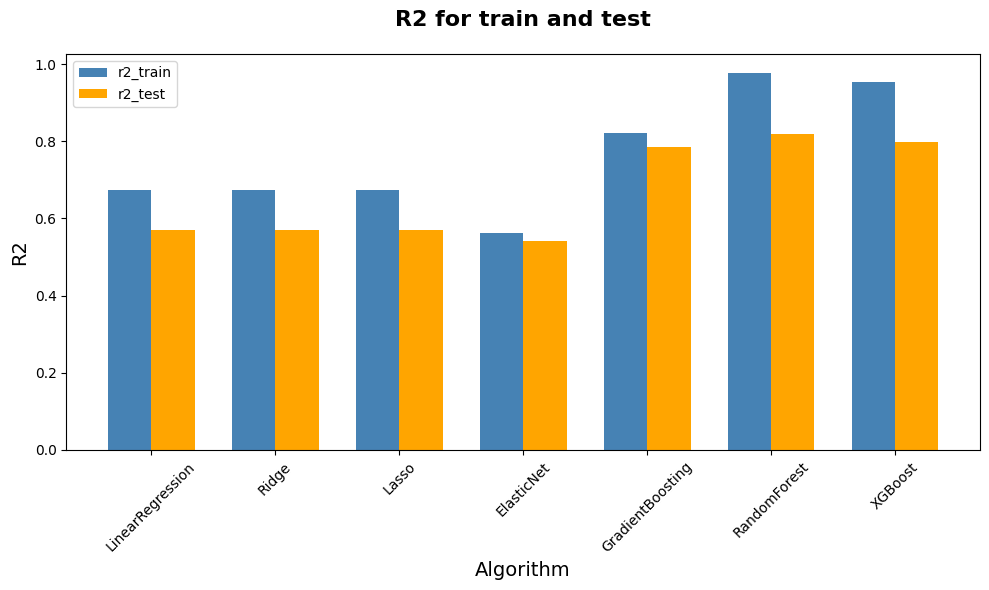

In [8]:
bar_width = 0.35
index = np.arange(len(df_models))
plt.figure(figsize=(10, 6))
plt.bar(index, df_models.r2_train, bar_width, label='r2_train', color='steelblue')
plt.bar(index + bar_width, df_models.r2_test, bar_width, label='r2_test', color='orange')

plt.title('R2 for train and test', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.xticks(index + bar_width / 2, df_models.Algorithm, rotation=45)  

plt.legend()

plt.tight_layout()
plt.show()

In [9]:
rf_model = RandomForestRegressor()
cv_results = cross_validate(rf_model, X_train_transformed, y_train, cv=5, 
                            scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
                            return_train_score=False)
# Output all metrics
print(f"Cross-validation MAE (negative): {cv_results['test_neg_mean_absolute_error']}")
print(f"Cross-validation MSE (negative): {cv_results['test_neg_mean_squared_error']}")
print(f"Cross-validation R²: {cv_results['test_r2']}")

# Display mean and standard deviation for each metric
print(f"Mean MAE across folds: {-np.mean(cv_results['test_neg_mean_absolute_error'])}")
print(f"Standard deviation of MAE: {np.std(cv_results['test_neg_mean_absolute_error'])}")

print(f"Mean MSE across folds: {-np.mean(cv_results['test_neg_mean_squared_error'])}")
print(f"Standard deviation of MSE: {np.std(cv_results['test_neg_mean_squared_error'])}")

print(f"Mean R² across folds: {np.mean(cv_results['test_r2'])}")
print(f"Standard deviation of R²: {np.std(cv_results['test_r2'])}")

print(f"Mean Fit Time for each fold: {np.mean(cv_results['fit_time']):.2f} seconds")

print(f"Mean Score Time for each fold: {np.mean(cv_results['score_time']):.2f} seconds")

Cross-validation MAE (negative): [-30276.56817741 -29931.53016349 -29368.95430345 -29507.72098728
 -30986.93702302]
Cross-validation MSE (negative): [-2.16988832e+09 -2.21859947e+09 -2.09999369e+09 -2.11977137e+09
 -2.21834996e+09]
Cross-validation R²: [0.84149919 0.82905927 0.84405364 0.83752074 0.83741345]
Mean MAE across folds: 30014.34213093029
Standard deviation of MAE: 582.1943964979341
Mean MSE across folds: 2165320560.7294135
Standard deviation of MSE: 49018266.29031145
Mean R² across folds: 0.8379092574764151
Standard deviation of R²: 0.005086455015822029
Mean Fit Time for each fold: 16.13 seconds
Mean Score Time for each fold: 0.07 seconds


### Cross-Validation Performance Evaluation

The results of the cross-validation demonstrate that the model is performing consistently across all folds. The metrics such as MAE, MSE, and R² show no significant variation, indicating that the model is stable. 

- The **mean R²** is relatively high, reflecting that the model explains a large portion of the variance in the data, while the **standard deviation of R²** is very low, which suggests minimal variability across folds.
  
- The **mean MAE** and **mean MSE** indicate moderate error levels, and the **standard deviations** of these errors are small, suggesting that the model's predictions are stable across different subsets of the data.

- Additionally, the **fit time** and **score time** are consistent, confirming that the model is efficient in both training and scoring phases.

Overall, the model does not exhibit overfitting. The consistency in performance across training and testing data, as shown by the stable evaluation metrics, suggests that the model generalizes well and is not overly complex or tailored to the training data. This indicates that the model is both stable and reliable.


In [10]:
rf_model = RandomForestRegressor(random_state=42)

# Define a reduced hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_depth': [10, 20, 30, None],              # Maximum depth of trees
    'min_samples_split': [2, 3, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 3],               # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt']          # Number of features to consider for best split
}

# Set up GridSearchCV with the reduced grid
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train_transformed, y_train)

# After fitting, display the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score (Negative MAE): {grid_search.best_score_}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_transformed)


mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test MAE: {mae_test}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAE): -30586.90336767807
Test MAE: 32929.48751692718
Test MSE: 2351608379.064106
Test R²: 0.8205439356634355


### Hyperparameter Tuning and Final Model Performance

After fitting 1080 models (5 folds for each of 216 candidate hyperparameter combinations), the best hyperparameters were found to be:

- **max_depth**: 30
- **max_features**: 'sqrt'
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 200

These hyperparameters resulted in the best performance, with a **negative MAE** of -30,586.90, indicating that the model minimizes the absolute errors effectively.

On the test set, the model achieved the following performance metrics:

- **Test MAE**: 32,929.49
- **Test MSE**: 2,351,608,379.06
- **Test R²**: 0.8205

The **Test MAE** suggests that the model’s predictions are reasonably close to the actual values. The **Test MSE** indicates that while there are some errors, they are not excessively large. The **Test R²** of 0.82 indicates that the model explains a significant portion of the variance in the data.

Overall, the model demonstrates good generalization ability and stable performance, with no signs of overfitting, as the test metrics are consistent with the results observed during the cross-validation phase.


# Model saving

In [11]:
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']